# Unsupervised Learning using Scikit Learn 


![](https://i.imgur.com/eyfi64y.png)

## Introduction to Unsupervised Learning

Unsupervised machine learning refers to the category of machine learning techniques where models are trained on a dataset without labels. Unsupervised learning is generally use to discover patterns in data and reduce high-dimensional data to fewer dimensions. Here's how unsupervised learning fits into the landscape of machine learning algorithms([source](https://medium.datadriveninvestor.com/machine-learning-in-10-minutes-354d83e5922e)):

<img src="https://miro.medium.com/max/842/1*tlQwBmbL6RkuuFq8OPJofw.png" width="640">

## Clustering 

Clustering is the process of grouping objects from a dataset such that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups ([Wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis)). Scikit-learn offers several clustering algorithms. You can learn more about them here: https://scikit-learn.org/stable/modules/clustering.html

Here is a visual representation of clustering:

<img src="https://i.imgur.com/VXPgw6H.png" width="400">


Here are some real-world applications of clustering:

* Customer segmentation 
* Product recommendation
* Feature engineering
* Anomaly/fraud detection
* Taxonomy creation

We'll use the [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) to study some of the clustering algorithms available in `scikit-learn`. It contains various measurements for 150 flowers belonging to 3 different species.

In [67]:
### Import 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno # To get visual representation of missing values
from plotly.subplots import make_subplots
import plotly.graph_objects as go


%matplotlib inline
import seaborn as sns
import missingno as msno # To get visual representation of missing values

#import opendatasets as od


import math
import scipy.stats as stats
from scipy.stats import skew
import statsmodels.api as sm

import sklearn.compose 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



import warnings
warnings.filterwarnings('ignore') # To ignore the warnings

In [68]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context ='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

### Download the dataset

In [69]:
iris_df = sns.load_dataset('iris')
iris_df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
77,6.7,3.0,5.0,1.7,versicolor
12,4.8,3.0,1.4,0.1,setosa
110,6.5,3.2,5.1,2.0,virginica
93,5.0,2.3,3.3,1.0,versicolor
121,5.6,2.8,4.9,2.0,virginica


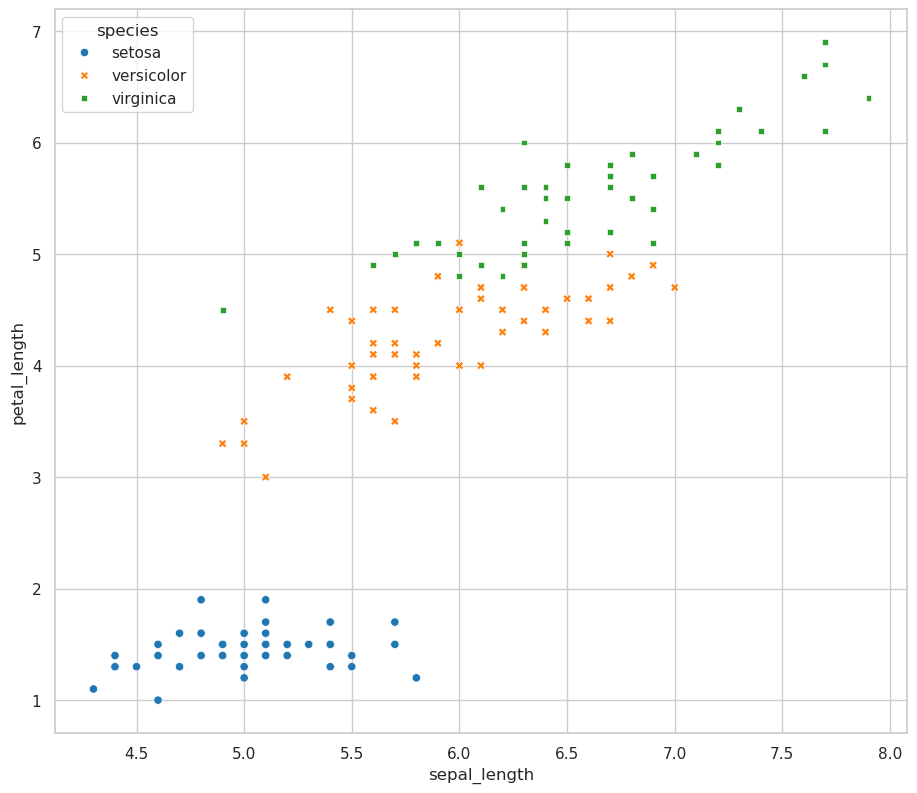

In [70]:
sns.scatterplot(data=iris_df,
                x='sepal_length',
                y='petal_length',
                hue='species',
                style='species')
plt.show()

We'll attempt to cluster observations using numeric columns in the data. 

In [71]:
numeric_cols = iris_df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [72]:
X = iris_df[numeric_cols]

### K Means Clustering

The K-means algorithm attempts to classify objects into a pre-determined number of clusters by finding optimal central points (called centroids) for each cluster. Each object is classifed as belonging the cluster represented by the closest centroid.

<img src="https://miro.medium.com/max/1400/1*rw8IUza1dbffBhiA4i0GNQ.png" width="640">

Here's how the K-means algorithm works:

1. Pick K random objects as the initial cluster centers.
2. Classify each object into the cluster whose center is closest to the point.
3. For each cluster of classified objects, compute the centroid (mean).
4. Now reclassify each object using the centroids as cluster centers.
5. Calculate the total variance of the clusters (this is the measure of goodness).
6. Repeat steps 1 to 6 a few more times and pick the cluster centers with the lowest total variance.

Here's a video showing the above steps: https://www.youtube.com/watch?v=4b5d3muPQmA

Let's apply K-means clustering to the Iris dataset.

In [73]:
from sklearn.cluster import KMeans

In [74]:
model = KMeans(n_clusters=3, random_state=42)

In [75]:
model.fit(X)

KMeans(n_clusters=3, random_state=42)

We can check the cluster centers for each cluster.

In [76]:
model.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

We can now classify points using the model.

In [77]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [78]:
preds = model.predict(X)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

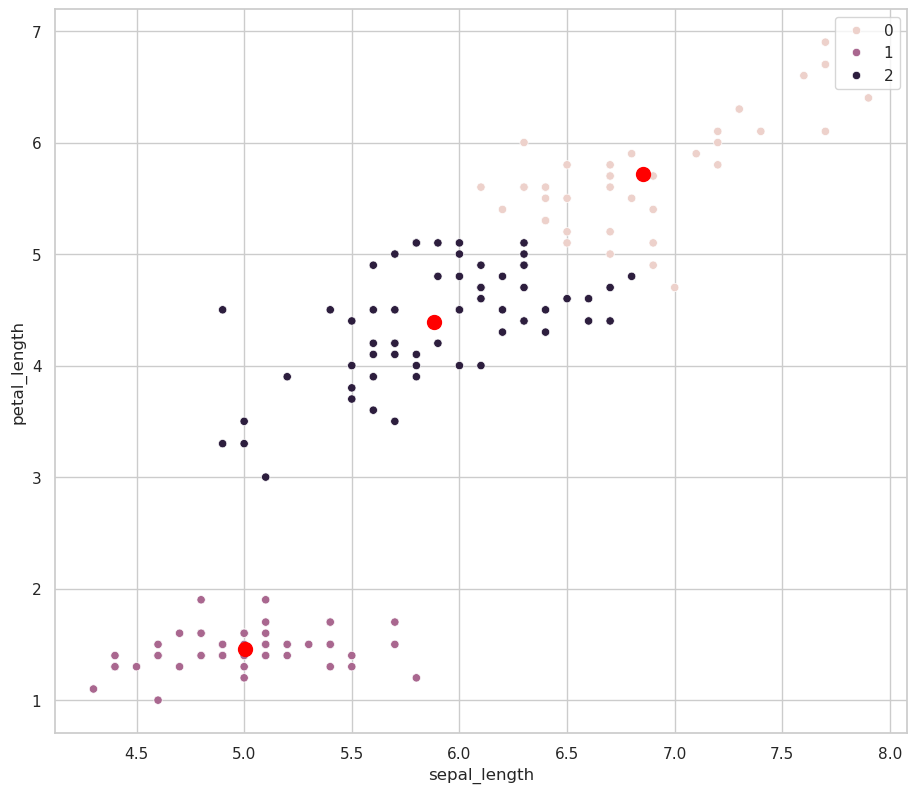

In [79]:
sns.scatterplot(data=X,
                x='sepal_length',
                y='petal_length',
                hue=preds)

center_x, center_y = model.cluster_centers_[:, 0], model.cluster_centers_[:, 2]
plt.scatter(center_x, center_y, color='red', s=100)
plt.show()

As you can see, K-means algorithm was able to classify (for the most part) different specifies of flowers into separate clusters. Note that we did not provide the "species" column as an input to `KMeans`.

We can check the "goodness" of the fit by looking at `model.inertia_`, which contains the sum of squared distances of samples to their closest cluster center. Lower the inertia, better the fit.

In [80]:
model.inertia_

78.8556658259773

Let's try creating 6 clusters.

In [81]:
model = KMeans(n_clusters=6, random_state=42).fit(X)

In [82]:
preds = model.predict(X)
preds

array([1, 5, 5, 5, 1, 1, 5, 1, 5, 5, 1, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1,
       5, 1, 5, 5, 1, 1, 1, 5, 5, 1, 1, 1, 5, 5, 1, 1, 5, 1, 1, 5, 5, 1,
       1, 5, 1, 5, 1, 5, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 4, 0, 3, 4, 4, 3, 2, 3, 4, 3,
       4, 4, 4, 0, 4, 4, 4, 3, 3, 0, 4, 0, 3, 0, 4, 3, 0, 0, 4, 3, 3, 3,
       4, 0, 0, 3, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 0], dtype=int32)

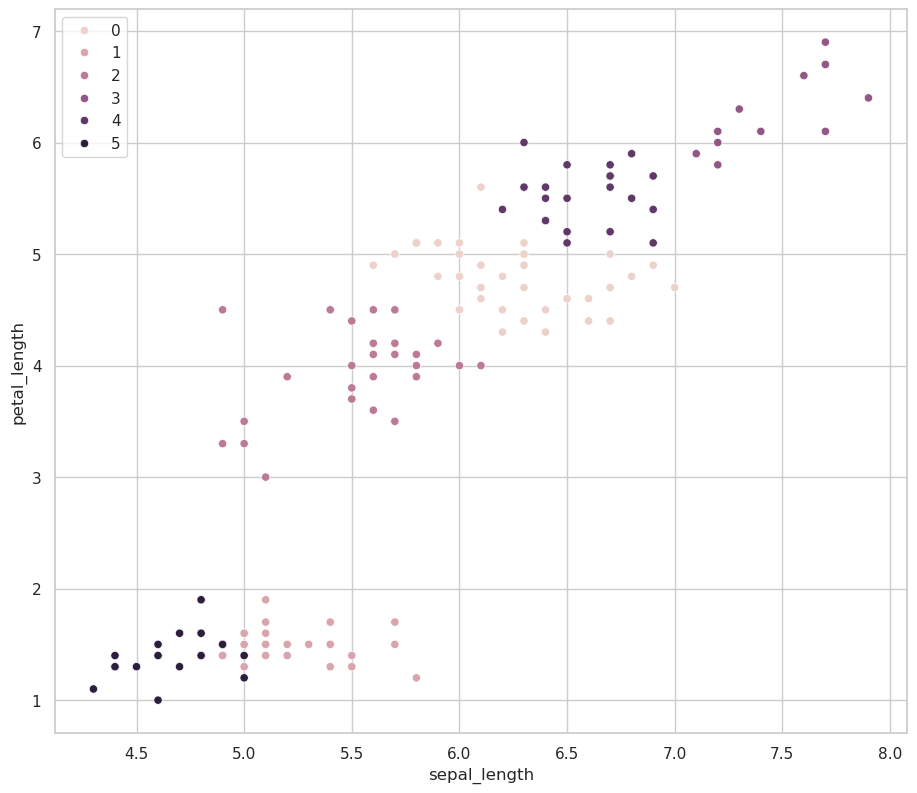

In [83]:
sns.scatterplot(data=X,
                x='sepal_length',
                y='petal_length',
                hue=preds)
plt.show()

In most real-world scenarios, there's no predetermined number of clusters. In such a case, you can create a plot of "No. of clusters" vs "Inertia" to pick the right number of clusters.

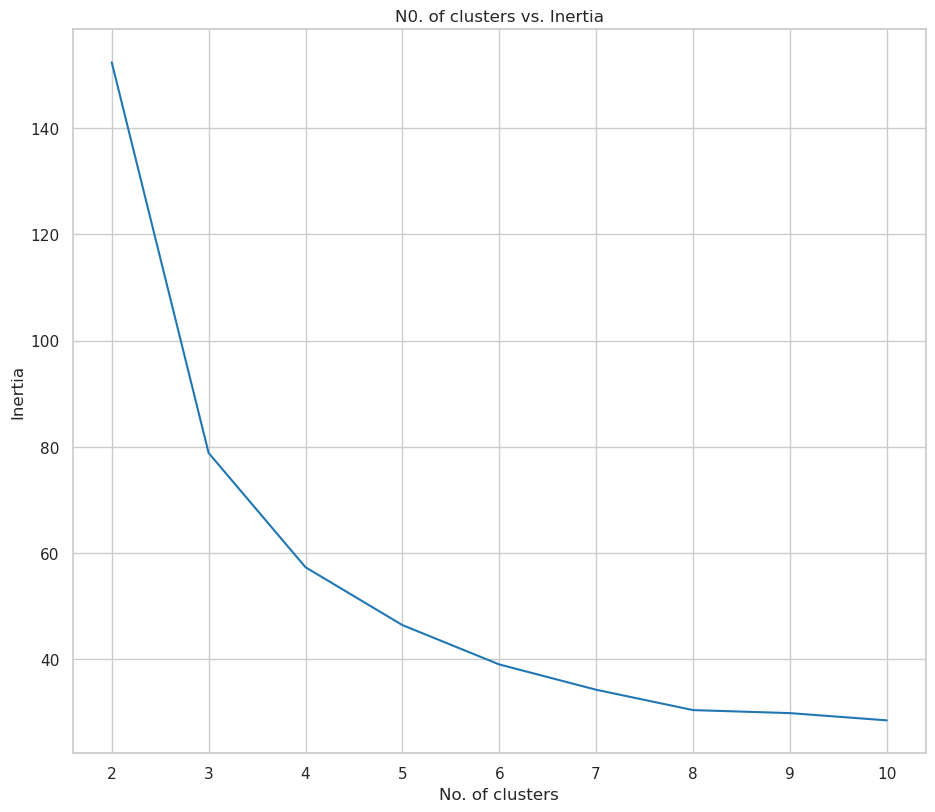

In [84]:
options = range(2, 11)
inertia = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertia.append(model.inertia_)

plt.title('N0. of clusters vs. Inertia')
plt.plot(options, inertia, markerfacecolor='red')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.show()

The chart is creates an "elbow" plot, and you can pick the number of clusters beyond which the reduction in inertia decreases sharply.

In [85]:
model = KMeans(n_clusters=3,
                init = 'k-means++',
                max_iter=300,
                n_init=10, 
                random_state=42).fit(X)

In [86]:
preds = model.predict(X)

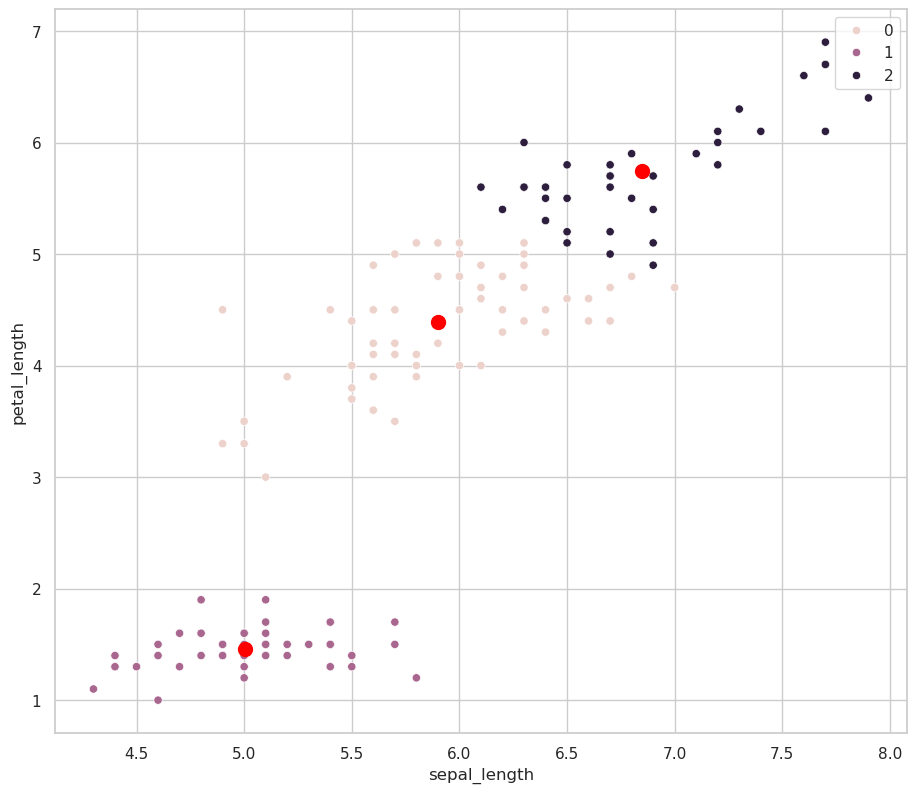

In [87]:
sns.scatterplot(data=X,
                x='sepal_length',
                y='petal_length',
                hue=preds)

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,2], color='red', s=100)
plt.show()


### DBSCAN

Density-based spatial clustering of applications with noise (DBSCAN) uses the density of points in a region to form clusters. It has two main parameters: "epsilon" and "min samples" using which it classifies each point as a core point, reachable point or noise point (outlier).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/800px-DBSCAN-Illustration.svg.png" width="400">

Here's a video explaining how the DBSCAN algorithm works: https://www.youtube.com/watch?v=C3r7tGRe2eI

In [88]:
from sklearn.cluster import DBSCAN

In [89]:
model = DBSCAN(eps=1.1, min_samples=4)

In [90]:
model.fit(X)

DBSCAN(eps=1.1, min_samples=4)

In DBSCAN, there's no prediction step. It directly assigns labels to all the inputs.

In [91]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

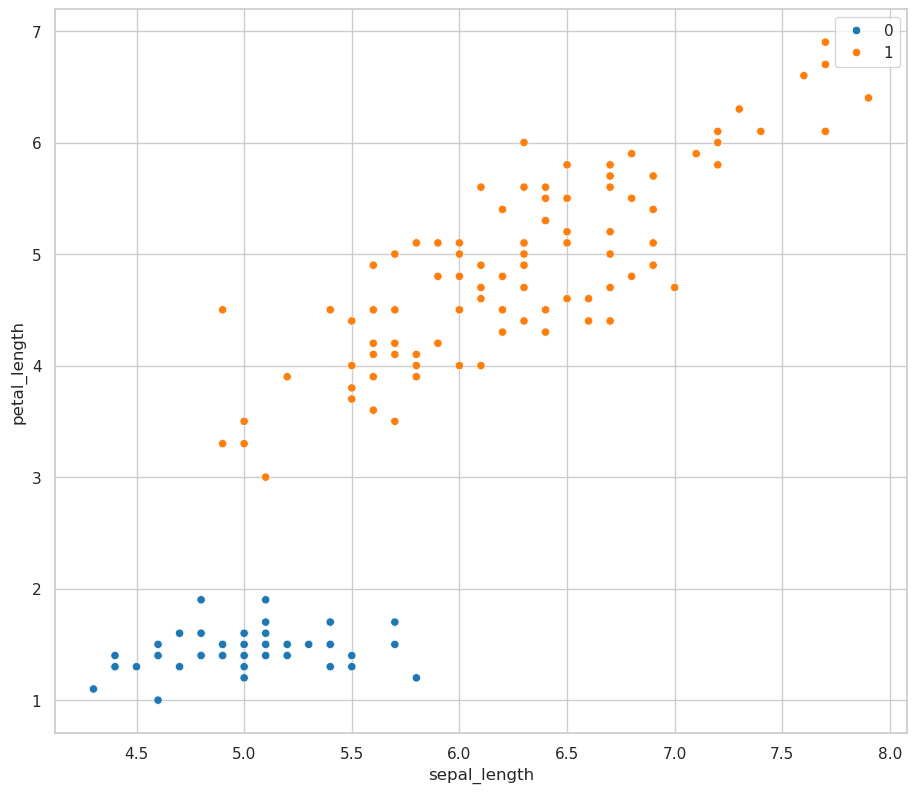

In [92]:
sns.scatterplot(data=X,
                x='sepal_length',
                y='petal_length',
                hue=model.labels_)
plt.show()

Here's how the results of DBSCAN and K Means differ:

<img src="https://miro.medium.com/max/1339/0*xu3GYMsWu9QiKNOo.png" width="640">

### Hierarchical Clustering

Hierarchical clustering, as the name suggests, creates a hierarchy or a tree of clusters.

<img src="https://dashee87.github.io/images/hierarch.gif" width="640">

While there are several approaches to hierarchical clustering, the most common approach works as follows:

1. Mark each point in the dataset as a cluster.
2. Pick the two closest cluster centers without a parent and combine them into a new cluster. 
3. The new cluster is the parent cluster of the two clusters, and its center is the mean of all the points in the cluster.
3. Repeat steps 2 and 3 till there's just one cluster left.

Watch this video for a visual explanation of hierarchical clustering: https://www.youtube.com/watch?v=7xHsRkOdVwo

## Dimensionality Reduction and Manifold Learning

In machine learning problems, we often encounter datasets with a very large number of dimensions (features or columns). Dimensionality reduction techniques are used to reduce the number of dimensions or features within the data to a manageable or convenient number. 


Applications of dimensionality reduction:

* Reducing size of data without loss of information
* Training machine learning models efficiently
* Visualizing high-dimensional data in 2/3 dimensions

### Principal Component Analysis (PCA)

Principal component is a dimensionality reduction technique that uses linear projections of data to reduce their dimensions, while attempting to maximize the variance of data in the projection. Watch this video to learn how PCA works: https://www.youtube.com/watch?v=FgakZw6K1QQ

Here's an example of PCA to reduce 2D data to 1D:

<img src="https://i.imgur.com/ZJ7utlo.png" width="480">

Here's an example of PCA to reduce 3D data to 2D:

<img src="https://www.researchgate.net/publication/345602552/figure/fig1/AS:1028064637104131@1622121118891/PCA-Example-3D-to-2D.png" width="640">


Let's apply Principal Component Analysis to the Iris dataset.

In [93]:
iris_df = sns.load_dataset('iris')
iris_df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
56,6.3,3.3,4.7,1.6,versicolor
0,5.1,3.5,1.4,0.2,setosa
129,7.2,3.0,5.8,1.6,virginica
120,6.9,3.2,5.7,2.3,virginica
148,6.2,3.4,5.4,2.3,virginica


In [94]:
numeric_cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [95]:
from sklearn.decomposition import PCA

In [96]:
pca = PCA(n_components=2)

In [97]:
pca.fit(iris_df[numeric_cols])

PCA(n_components=2)

In [98]:
pca

PCA(n_components=2)

In [99]:
transformed = pca.transform(iris_df[numeric_cols])

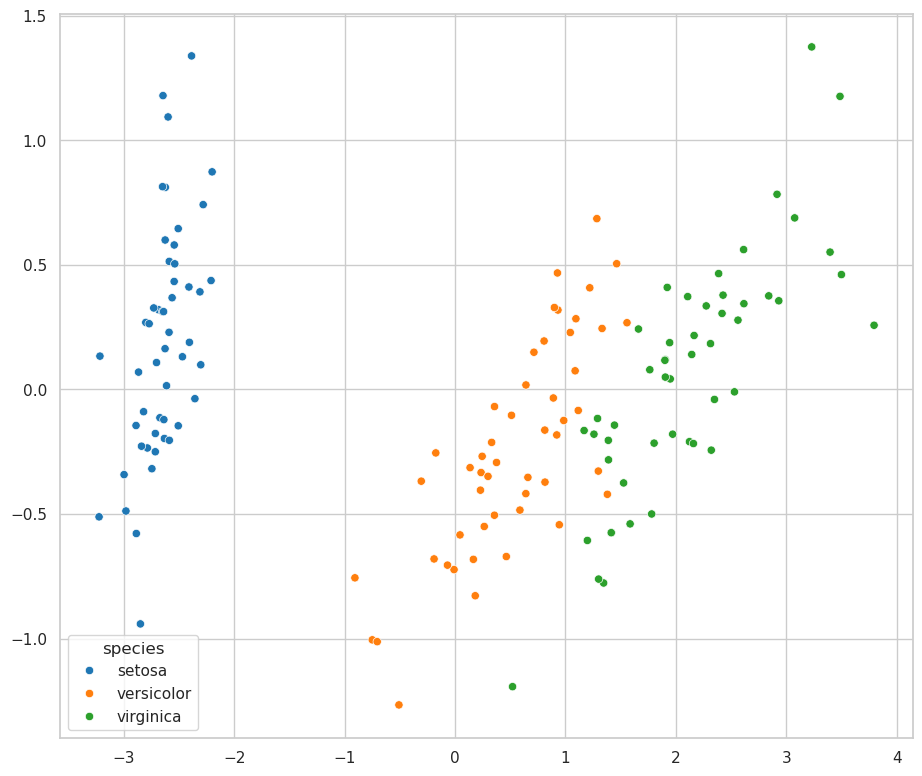

In [100]:
sns.scatterplot(x=transformed[:, 0],
                y=transformed[:, 1],
                hue=iris_df['species'])
plt.show()

As you can see, the PCA algorithm has done a very good job of separating different species of flowers using just 2 measures.

### t-Distributed Stochastic Neighbor Embedding (t-SNE)

Manifold learning is an approach to non-linear dimensionality reduction. Algorithms for this task are based on the idea that the dimensionality of many data sets is only artificially high. Scikit-learn provides many algorithms for manifold learning: https://scikit-learn.org/stable/modules/manifold.html . A commonly-used manifold learning technique is t-Distributed Stochastic Neighbor Embedding or t-SNE, used to visualize high dimensional data in one, two or three dimensions. 

Here's a visual representation of t-SNE applied to visualize 2 dimensional data in 1 dimension:

<img src="https://i.imgur.com/rVMAaix.png" width="360">


Here's a visual representation of t-SNE applied to the MNIST dataset, which contains 28px x 28px images of handrwritten digits 0 to 9, a reduction from 784 dimensions to 2 dimensions ([source](https://colah.github.io/posts/2014-10-Visualizing-MNIST/)):

<img src="https://i.imgur.com/kpD7d2a.png" width="640">

Here's a video explaning how t-SNE works: https://www.youtube.com/watch?v=NEaUSP4YerM

In [101]:
from sklearn.manifold import TSNE

In [102]:
tsne = TSNE(n_components=2, random_state=42)

In [103]:
transformed = tsne.fit_transform(iris_df[numeric_cols])

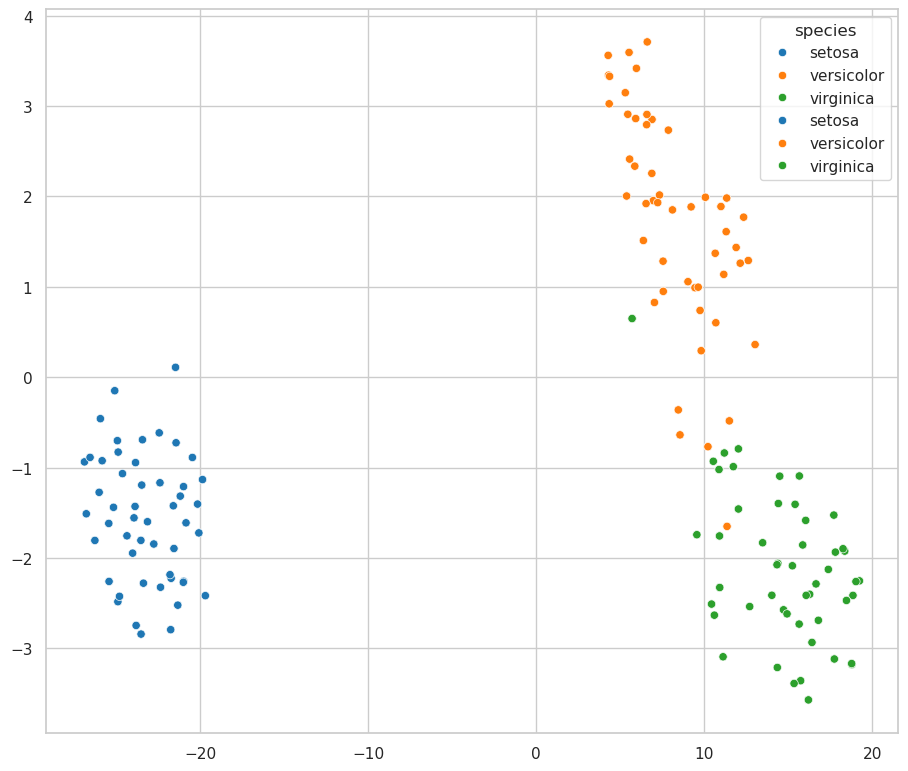

In [105]:
sns.scatterplot(x=transformed[:, 0],
                y=transformed[:, 1],
                hue=iris_df['species'])
plt.show()

As you can see, the flowers from the same species are clustered very closely together. The relative distance between the species is also conveyed by the gaps between the clusters.